In [2]:
%matplotlib inline

In [3]:
# Add the Pandas dependency
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# File to load
ny_data_to_load = "NY_state.csv"

In [5]:
# Read the NY plant data and store it in a Pandas DataFrame
ny_data_df = pd.read_csv(ny_data_to_load)
# ny_data_df.head()

In [6]:
# Determine the amount of missing data in NY plant data.
# Missing data is expected in the Synonym Symbol and National Common Name columns.
ny_data_df.notnull().sum()

Symbol                         16351
Synonym Symbol                 10182
Scientific Name with Author    16351
National Common Name            6160
Family                         16351
dtype: int64

In [7]:
# Confirm that the data type is object for the DataFrame.
ny_data_df.dtypes

Symbol                         object
Synonym Symbol                 object
Scientific Name with Author    object
National Common Name           object
Family                         object
dtype: object

In [8]:
# Get the total rows of data.
plant_count = ny_data_df['Symbol'].count()
plant_count

16351

## TOP 10 COMMON PLANT FAMILY ANAlYSIS

In [9]:
# Get the total numbers for Family.
family_count = len(ny_data_df["Family"].unique())
# family_count

In [10]:
# Double checked from https://stackoverflow.com/questions/38309729/count-unique-values-with-pandas-per-groups
# Get the count for each Family represented.
family_data = ny_data_df.Family.value_counts()
# family_data.head()

Text(0.5, 0, 'Family Name')

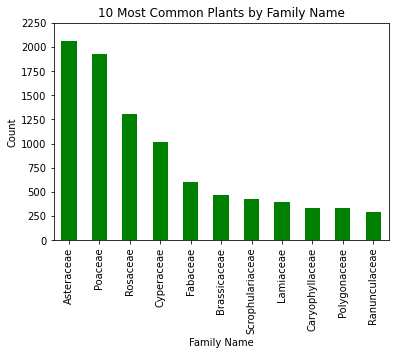

In [11]:
# Create a bar graph of top 10
family_data.plot.bar(x = "Family", y = "Count", 
                    color="green")
# Add chart elements
plt.title("10 Most Common Plants by Family Name")
plt.xlim(-0.5, 10.5)
plt.ylim(0, 2250)
plt.ylabel("Count")
plt.xlabel("Family Name")

In [12]:
# Get the percent each Family represents from total Plants
family_percentage = family_data/float(plant_count)*100
# family_percentage.head(10)

Text(0.5, 0, 'Family Name')

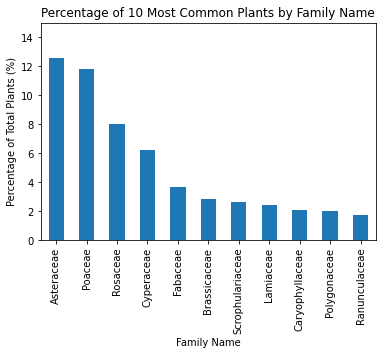

In [13]:
# Create a pie chart of top 10
family_percentage.plot.bar(x = "Family", y = "Percentage")
# Add chart elements
plt.title("Percentage of 10 Most Common Plants by Family Name")
plt.xlim(-0.5, 10.5)
plt.ylim(0, 15)
plt.ylabel("Percentage of Total Plants (%)")
plt.xlabel("Family Name")

In [14]:
# Get the Family information into a new DataFrame.
family_df = pd.DataFrame({"Count": family_data,
                         "Percentage of Plants": family_percentage})
# Format the columns.
family_df["Percentage of Plants"] = family_df["Percentage of Plants"].map("{:,.2f}%".format)

family_df.head(10)

,Count,Percentage of Plants
Asteraceae,2057,12.58%
Poaceae,1927,11.79%
Rosaceae,1305,7.98%
Cyperaceae,1016,6.21%
Fabaceae,604,3.69%
Brassicaceae,468,2.86%
Scrophulariaceae,430,2.63%
Lamiaceae,399,2.44%
Caryophyllaceae,338,2.07%
Polygonaceae,331,2.02%


# # TOP 10 COMMON PLANT SPECIES

In [15]:
species_names = ny_data_df["Scientific Name with Author"].tolist()
for name in species_names:
    print(name.split(),len(name.split()))
genus=[]
for name in species_names:
    genus.append(name.split()[0])
ny_data_df["Genus"] = genus
species=[]
for name in species_names:
    species.append(name.split()[1])
ny_data_df["Species"] = species
ny_data_df["Scientific_Name"] = ny_data_df["Genus"] +" " + ny_data_df["Species"]

['Justicia', 'americana', '(L.)', 'Vahl'] 4
['Dianthera', 'americana', 'L.'] 3
['Dianthera', 'americana', 'L.', 'var.', 'subcoriacea', '(Fernald)', 'Shinners'] 7
['Justicia', 'americana', '(L.)', 'Vahl', 'var.', 'subcoriacea', 'Fernald'] 7
['Justicia', 'mortuifluminis', 'Fernald'] 3
['Justicia', 'umbratilis', 'Fernald'] 3
['Justicia', 'L.'] 2
['Acarospora', 'A.', 'Massal.'] 3
['Acer', 'campestre', 'L.'] 3
['Acer', 'L.'] 2
['Acer', '×freemanii', 'A.E.', 'Murray', '[rubrum', '×', 'saccharinum]'] 7
['Acer', 'ginnala', 'Maxim.'] 3
['Acer', 'tataricum', 'L.', 'ssp.', 'ginnala', '(Maxim.)', 'Wesmael'] 7
['Acer', 'negundo', 'L.'] 3
['Acer', 'negundo', 'L.', 'var.', 'negundo'] 5
['Acer', 'negundo', 'L.', 'var.', 'variegatum', 'Jacques'] 6
['Negundo', 'aceroides', '(L.)', 'Moench'] 4
['Negundo', 'negundo', '(L.)', 'Karst.,', 'nom.', 'inval.'] 6
['Acer', 'negundo', 'L.', 'var.', 'violaceum', '(G.', 'Kirchn.)', 'H.', 'Jaeger'] 9
['Negundo', 'aceroides', '(L.)', 'Moench', 'ssp.', 'violaceum', '(G.

['Artemisia', 'vulgaris', 'L.', 'var.', 'vulgaris'] 5
['Arctium', 'vulgare', '(Hill)', 'Evans'] 4
['Arctium', 'minus', 'Bernh.', 'ssp.', 'nemorosum', '(Lej.', '&', 'Court.)', 'Syme'] 9
['Arctium', 'nemorosum', 'Lej.', '&', 'Court.'] 5
['Baccharis', 'L.'] 2
['Baccharis', 'halimifolia', 'L.'] 3
['Baccharis', 'halimifolia', 'L.', 'var.', 'angustior', 'DC.'] 6
['Bellis', 'L.'] 2
['Bellis', 'perennis', 'L.'] 3
['Bidens', 'aristosa', '(Michx.)', 'Britton'] 4
['Bidens', 'aristosa', '(Michx.)', 'Britton', 'var.', 'fritcheyi', 'Fernald'] 7
['Bidens', 'aristosa', '(Michx.)', 'Britton', 'var.', 'mutica', '(A.', 'Gray)', 'Gattinger'] 9
['Bidens', 'aristosa', '(Michx.)', 'Britton', 'var.', 'retrorsa', '(Sherff)', 'Wunderlin'] 8
['Bidens', 'involucrata', '(Nutt.)', 'Britton'] 4
['Bidens', 'polylepis', 'S.F.', 'Blake'] 4
['Bidens', 'polylepis', 'S.F.', 'Blake', 'var.', 'retrorsa', 'Sherff'] 7
['Bidens', 'beckii', 'Torr.', 'ex', 'Spreng.'] 5
['Megalodonta', 'beckii', '(Torr.', 'ex', 'Spreng.)', 'Green

['Rudbeckia', 'hirta', 'L.', 'var.', 'pulcherrima', 'Farw.'] 6
['Rudbeckia', 'bicolor', 'Nutt.'] 3
['Rudbeckia', 'hirta', 'L.', 'var.', 'corymbifera', 'Fernald'] 6
['Rudbeckia', 'hirta', 'L.', 'var.', 'lanceolata', '(Bisch.)', 'Core'] 7
['Rudbeckia', 'hirta', 'L.', 'var.', 'sericea', '(T.V.', 'Moore)', 'Fernald'] 8
['Rudbeckia', 'hirta', 'L.', 'var.', 'serotina', '(Nutt.)', 'Core'] 7
['Rudbeckia', 'longipes', 'T.V.', 'Moore'] 4
['Rudbeckia', 'sericea', 'T.V.', 'Moore'] 4
['Rudbeckia', 'serotina', 'Nutt.'] 3
['Rudbeckia', 'serotina', 'Nutt.', 'var.', 'corymbifera', '(Fernald)', 'Fernald', '&', 'B.G.', 'Schub.'] 10
['Rudbeckia', 'serotina', 'Nutt.', 'var.', 'lanceolata', '(Bisch.)', 'Fernald', '&', 'B.G.', 'Schub.'] 10
['Rudbeckia', 'serotina', 'Nutt.', 'var.', 'sericea', '(T.V.', 'Moore)', 'Fernald', '&', 'B.G.', 'Schub.'] 11
['Rudbeckia', 'laciniata', 'L.'] 3
['Rudbeckia', 'laciniata', 'L.', 'var.', 'bipinnata', 'Perdue'] 6
['Rudbeckia', 'laciniata', 'L.', 'var.', 'laciniata'] 5
['Rudb

['Alnus', 'noveboracensis', 'Britton'] 3
['Alnus', 'serrulata', '(Aiton)', 'Willd.', 'var.', 'subelliptica', 'Fernald'] 7
['Alnus', 'viridis', '(Chaix)', 'DC.'] 4
['Alnus', 'viridis', '(Chaix)', 'DC.', 'ssp.', 'crispa', '(Aiton)', 'Turrill'] 8
['Alnus', 'crispa', '(Aiton)', 'Pursh'] 4
['Alnus', 'crispa', '(Aiton)', 'Pursh', 'var.', 'elongata', 'Raup'] 7
['Alnus', 'crispa', '(Aiton)', 'Pursh', 'var.', 'mollis', '(Fernald)', 'Fernald'] 8
['Alnus', '×hultenii', 'Murai', 'p.p.'] 4
['Alnus', 'viridis', '(Chaix)', 'DC.', 'var.', 'crispa', '(Aiton)', 'House'] 8
['Duschekia', 'viridis', '(Chaix)', 'Opiz', 'p.p.'] 5
['Betula', 'alleghaniensis', 'Britton'] 3
['Betula', 'alleghaniensis', 'Britton', 'var.', 'alleghaniensis'] 5
['Betula', 'alleghaniensis', 'Britton', 'var.', 'fallax', '(Fassett)', 'Brayshaw'] 7
['Betula', 'lutea', 'Michx.', 'f.'] 4
['Betula', 'lutea', 'Michx.', 'f.', 'var.', 'fallax', 'Fassett'] 7
['Betula', 'alleghaniensis', 'Britton', 'var.', 'macrolepis', '(Fernald)', 'Brayshaw'

['Silene', 'antirrhina', 'L.', 'var.', 'depauperata', 'Rydb.'] 6
['Silene', 'antirrhina', 'L.', 'var.', 'divaricata', 'B.L.', 'Rob.'] 7
['Silene', 'antirrhina', 'L.', 'var.', 'laevigata', 'Engelm.', '&', 'A.', 'Gray'] 9
['Silene', 'antirrhina', 'L.', 'var.', 'subglaber', 'Engelm.', '&', 'A.', 'Gray'] 9
['Silene', 'antirrhina', 'L.', 'var.', 'vaccarifolia', 'Rydb.'] 6
['Silene', 'armeria', 'L.'] 3
['Silene', 'caroliniana', 'Walter'] 3
['Silene', 'caroliniana', 'Walter', 'ssp.', 'pensylvanica', '(Michx.)', 'R.T.', 'Clausen'] 8
['Silene', 'caroliniana', 'Walter', 'var.', 'pensylvanica', '(Michx.)', 'Fernald'] 7
['Silene', 'pensylvanica', 'Michx.'] 3
['Silene', 'conica', 'L.'] 3
['Pleconax', 'conica', '(L.)', 'Sourkova'] 4
['Silene', 'csereii', 'Baumg.'] 3
['Silene', 'dichotoma', 'Ehrh.'] 3
['Silene', 'dioica', '(L.)', 'Clairville'] 4
['Lychnis', 'dioica', 'L.'] 3
['Melandrium', 'dioicum', '(L.)', 'Coss.', '&', 'Germ.'] 6
['Melandrium', 'dioicum', '(L.)', 'Coss.', '&', 'Germ.', 'ssp.', 'ru

['Carex', 'laxiflora', 'Lam.', 'var.', 'blanda', '(Dewey)', 'Boott'] 7
['Carex', 'brevior', '(Dewey)', 'Mack.'] 4
['Carex', 'festucacea', 'Schkuhr', 'ex', 'Willd.', 'var.', 'brevior', '(Dewey)', 'Fernald'] 9
['Carex', 'bromoides', 'Schkuhr', 'ex', 'Willd.'] 5
['Carex', 'brunnescens', '(Pers.)', 'Poir.'] 4
['Carex', 'brunnescens', '(Pers.)', 'Poir.', 'ssp.', 'brunnescens'] 6
['Carex', 'brunnescens', '(Pers.)', 'Poir.', 'ssp.', 'alaskana', 'Kalela'] 7
['Carex', 'bromoides', 'Schkuhr', 'ex', 'Willd.', 'ssp.', 'bromoides'] 7
['Carex', 'bromoides', 'Schkuhr', 'ex', 'Willd.', 'var.', 'bromoides'] 7
['Carex', 'brunnescens', '(Pers.)', 'Poir.', 'ssp.', 'sphaerostachya', '(Tuck.)', 'Kalela'] 8
['Carex', 'brunnescens', '(Pers.)', 'Poir.', 'var.', 'sphaerostachya', '(Tuck.)', 'Kük.'] 8
['Carex', 'bushii', 'Mack.'] 3
['Carex', 'caroliniana', 'Schwein.', 'var.', 'cuspidata', '(Dewey)', 'Shinners'] 7
['Carex', 'buxbaumii', 'Wahlenb.'] 3
['Carex', 'bullata', 'Schkuhr', 'ex', 'Willd.'] 5
['Carex', 'ca

['Decachaena', 'frondosa', '(L.)', 'Torr.', '&', 'A.', 'Gray'] 7
['Gaultheria', 'hispidula', '(L.)', 'Muhl.', 'ex', 'Bigelow'] 6
['Chiogenes', 'hispidula', '(L.)', 'Torr.', '&', 'A.', 'Gray'] 7
['Gaultheria', 'procumbens', 'L.'] 3
['Gaultheria', 'L.'] 2
['Gaylussacia', 'Kunth'] 2
['Harrimanella', 'hypnoides', '(L.)', 'Coville'] 4
['Cassiope', 'hypnoides', '(L.)', 'D.', 'Don'] 5
['Harrimanella', 'Coville'] 2
['Kalmia', 'angustifolia', 'L.'] 3
['Kalmia', 'latifolia', 'L.'] 3
['Kalmia', 'latifolia', 'L.', 'var.', 'laevipes', 'Fernald'] 6
['Kalmia', 'L.'] 2
['Kalmia', 'polifolia', 'Wangenh.'] 3
['Chamaedaphne', 'glauca', '(Aiton)', 'Kuntze'] 4
['Kalmia', 'polifolia', 'Wangenh.', 'ssp.', 'polifolia'] 5
['Kalmia', 'polifolia', 'Wangenh.', 'var.', 'rosmarinifolia', '(Pursh)', 'Rehder'] 7
['Ledum', 'L.'] 2
['Leucothoe', 'fontanesiana', '(Steud.)', 'Sleumer'] 4
['Leucothoe', 'axillaris', '(Lam.)', 'D.', 'Don', 'var.', 'editorum', '(Fernald', '&', 'B.G.', 'Schub.)', 'H.E.', 'Ahles'] 13
['Leucoth

['Physcomitrium', 'drummondii', 'E.', 'Britton'] 4
['Physcomitrium', 'kellermanii', 'E.', 'Britton'] 4
['Physcomitrium', 'kellermanii', 'E.', 'Britton', 'var.', 'drummondii', '(E.', 'Britton)', 'Grout'] 9
['Physcomitrium', 'megalocarpum', 'Kindb.'] 3
['Physcomitrium', 'megalocarpum', 'Kindb.', 'var.', 'californicum', '(E.', 'Britton)', 'Grout'] 8
['Physcomitrium', 'pyriforme', '(Hedw.)', 'Hampe', 'var.', 'serratum', '(Renauld', '&', 'Cardot)', 'H.A.', 'Crum', '&', 'L.E.', 'Anderson'] 14
['Physcomitrium', 'turbinatum', 'Müll.', 'Hal.', 'ex', 'Lesq.', '&', 'James'] 8
['Physcomitrium', 'turbinatum', '(Michx.)', 'E.', 'Britton,', 'non', 'Müll.', 'Hal.', 'ex', 'Lesq.', '&', 'James,', 'nom.', 'illeg.'] 14
['Physcomitrium', 'turbinatum', '(Michx.)', 'E.', 'Britton', 'var.', 'langloisii', '(Renauld', '&', 'Cardot)', 'E.', 'Britton'] 12
['Physcomitrium', 'turbinatum', '(Michx.)', 'E.', 'Britton', 'f.', 'australe', '(E.', 'Britton)', 'Grout'] 10
['Physcomitrium', '(Brid.)', 'Brid.'] 3
['Bartonia

['Chamaelirium', 'Willd.'] 2
['Chamaelirium', 'luteum', '(L.)', 'A.', 'Gray'] 5
['Chamaelirium', 'obovale', 'Small'] 3
['Veratrum', 'luteum', 'L.'] 3
['Clintonia', 'borealis', '(Aiton)', 'Raf.'] 4
['Dracaena', 'borealis', 'Aiton'] 3
['Clintonia', 'Raf.'] 2
['Clintonia', 'umbellulata', '(Michx.)', 'Morong'] 4
['Clintonia', 'alleghaniensis', 'Harned'] 3
['Xeniatrum', 'umbellulatum', '(Michx.)', 'Small'] 4
['Colchicum', 'autumnale', 'L.'] 3
['Colchicum', 'L.'] 2
['Convallaria', 'majalis', 'L.'] 3
['Convallaria', 'L.'] 2
['Erythronium', 'albidum', 'Nutt.'] 3
['Erythronium', 'americanum', 'Ker', 'Gawl.'] 4
['Erythronium', 'americanum', 'Ker', 'Gawl.', 'ssp.', 'americanum'] 6
['Erythronium', 'L.'] 2
['Galanthus', 'elwesii', 'Hook.', 'f.'] 4
['Galanthus', 'elewesii', 'Hook.', 'f.,', 'database', 'artifact'] 6
['Galanthus', 'L.'] 2
['Galanthus', 'nivalis', 'L.'] 3
['Helonias', 'bullata', 'L.'] 3
['Hemerocallis', 'fulva', '(L.)', 'L.'] 4
['Hemerocallis', 'fulva', '(L.)', 'L.', 'var.', 'fulva'] 6

['Corallorhiza', 'odontorhiza', '(Willd.)', 'Poir.', 'var.', 'pringlei', '(Greenm.)', 'Freudenstein'] 8
['Corallorrhiza', 'odontorhiza', '(Willd.)', 'Poir.', 'var.', 'pringlei', '(Greenm.)', 'Freudenstein,', 'orth.', 'var.'] 10
['Corallorhiza', 'Gagnebin,', 'orth.', 'cons.'] 4
['Corallorrhiza', 'Gagnebin,', 'orth.', 'rej.'] 4
['Corallorhiza', 'striata', 'Lindl.'] 3
['Corallorrhiza', 'striata', 'Lindl.,', 'orth.', 'var.'] 5
['Corallorhiza', 'striata', 'Lindl.', 'var.', 'striata'] 5
['Corallorhiza', 'ochroleuca', 'Rydb.'] 3
['Corallorhiza', 'striata', 'Lindl.', 'var.', 'flavida', 'Todsen', '&', 'Todsen'] 8
['Corallorhiza', 'striata', 'Lindl.', 'var.', 'ochroleuca', '(Rydb.)', 'Magrath'] 7
['Corallorrhiza', 'ochroleuca', 'Rydb.,', 'orth.', 'var.'] 5
['Corallorrhiza', 'striata', 'Lindl.', 'var.', 'flavida', 'Todsen', '&', 'Todsen,', 'orth.', 'var.'] 10
['Corallorrhiza', 'striata', 'Lindl.', 'var.', 'ochroleuca', '(Rydb.)', 'Magrath,', 'orth.', 'var.'] 9
['Corallorrhiza', 'striata', 'Lindl.

['Deschampsia', 'flexuosa', '(L.)', 'Trin.', 'var.', 'flexuosa'] 6
['Aira', 'flexuosa', 'L.'] 3
['Avenella', 'flexuosa', '(L.)', 'Drejer'] 4
['Lerchenfeldia', 'flexuosa', '(L.)', 'Schur'] 4
['Deschampsia', 'flexuosa', '(L.)', 'Trin.', 'var.', 'montana', '(L.)', 'Ducomm.'] 8
['Avenella', 'flexuosa', '(L.)', 'Drejer', 'ssp.', 'montana', '(L.)', 'Á.', 'Löve', '&', 'D.', 'Löve'] 12
['Deschampsia', 'flexuosa', '(L.)', 'Trin.', 'ssp.', 'montana', '(L.)', 'Á.', 'Löve', '&', 'D.', 'Löve'] 12
['Deschampsia', 'flexuosa', '(L.)', 'Trin.', 'var.', 'pallida', 'Berl.'] 7
['Lerchenfeldia', 'flexuosa', '(L.)', 'Schur', 'ssp.', 'montana', '(L.)', 'Tzvelev'] 8
['Deschampsia', 'P.', 'Beauv.'] 3
['Dichanthelium', 'aciculare', '(Desv.', 'ex', 'Poir.)', 'Gould', '&', 'C.A.', 'Clark'] 9
['Dichanthelium', 'angustifolium', '(Elliott)', 'Gould'] 4
['Dichanthelium', 'fusiforme', '(Hitchc.)', 'Harville'] 4
['Panicum', 'aciculare', 'Desv.', 'ex', 'Poir.'] 5
['Panicum', 'aciculare', 'Desv.', 'ex', 'Poir.', 'var.', 

['Lolium', 'multiflorum', 'Lam.', 'var.', 'muticum', 'DC.'] 6
['Lolium', 'perenne', 'L.', 'ssp.', 'italicum', '(A.', 'Braun)', 'Husnot'] 8
['Lolium', 'perenne', 'L.', 'var.', 'aristatum', 'Willd.'] 6
['Lolium', 'perenne', 'L.', 'var.', 'multiflorum', '(Lam.)', 'Parnell'] 7
['Lolium', 'perenne', 'L.', 'ssp.', 'perenne'] 5
['Lolium', 'multiflorum', 'Lam.', 'var.', 'ramosum', 'Guss.', 'ex', 'Arcang.'] 8
['Lolium', 'perenne', 'L.', 'var.', 'cristatum', 'Pers.', 'ex', 'B.D.', 'Jacks.'] 9
['Lolium', 'temulentum', 'L.'] 3
['Lolium', 'temulentum', 'L.', 'ssp.', 'temulentum'] 5
['Lolium', 'arvense', 'With.'] 3
['Lolium', 'temulentum', 'L.', 'var.', 'arvense', '(With.)', 'Lilja'] 7
['Lolium', 'temulentum', 'L.', 'var.', 'leptochaeton', 'A.', 'Braun'] 7
['Lolium', 'temulentum', 'L.', 'var.', 'macrochaeton', 'A.', 'Braun'] 7
['Melica', 'altissima', 'L.'] 3
['Melica', 'L.'] 2
['Mibora', 'Adans.'] 2
['Microstegium', 'Nees'] 2
['Milium', 'effusum', 'L.'] 3
['Milium', 'effusum', 'L.', 'var.', 'cisatla

['Truellum', 'sagittatum', '(L.)', 'Soják'] 4
['Polygonum', 'scandens', 'L.'] 3
['Polygonum', 'scandens', 'L.', 'var.', 'cristatum', '(Engelm.', '&', 'A.', 'Gray)', 'Gleason'] 10
['Bilderdykia', 'cristata', '(Engelm.', '&', 'A.', 'Gray)', 'Greene'] 7
['Bilderdykia', 'scandens', '(L.)', 'Greene', 'var.', 'cristata', '(Engelm.', '&', 'A.', 'Gray)', 'C.F.', 'Reed'] 12
['Fallopia', 'cristata', '(Engelm.', '&', 'A.', 'Gray)', 'Holub'] 7
['Polygonum', 'cristatum', 'Engelm.', '&', 'A.', 'Gray'] 6
['Reynoutria', 'scandens', '(L.)', 'Shinners', 'var.', 'cristata', '(Engelm.', '&', 'A.', 'Gray)', 'Shinners'] 11
['Tiniaria', 'cristata', '(Engelm.', '&', 'A.', 'Gray)', 'Small'] 7
['Polygonum', 'scandens', 'L.', 'var.', 'dumetorum', '(L.)', 'Gleason'] 7
['Bilderdykia', 'dumetorum', '(L.)', 'Dumort.'] 4
['Fallopia', 'dumetorum', '(L.)', 'Holub'] 4
['Polygonum', 'dumetorum', 'L.'] 3
['Reynoutria', 'scandens', '(L.)', 'Shinners', 'var.', 'dumetorum', '(L.)', 'Shinners'] 8
['Tiniaria', 'dumetorum', '(L

['Ranunculus', 'septentrionalis', 'Poir.', 'var.', 'pterocarpus', 'L.D.', 'Benson'] 7
['Ranunculus', 'longirostris', 'Godr.'] 3
['Batrachium', 'circinatum', '(Sibth.)', 'Rchb.'] 4
['Batrachium', 'circinatum', '(Sibth.)', 'Rchb.', 'ssp.', 'subrigidum', '(W.', 'Drew)', 'Á.', 'Löve', '&', 'D.', 'Löve'] 13
['Batrachium', 'longirostre', '(Godr.)', 'F.W.', 'Schultz'] 5
['Ranunculus', 'amphibius', 'James'] 3
['Ranunculus', 'aquatilis', 'L.', 'var.', 'diffusus', 'With.', 'p.p.'] 7
['Ranunculus', 'aquatilis', 'L.', 'var.', 'longirostris', '(Godr.)', 'G.', 'Lawson'] 8
['Ranunculus', 'aquatilis', 'L.', 'var.', 'subrigidus', '(W.', 'Drew)', 'Breitung'] 8
['Ranunculus', 'circinatus', 'auct.', 'non', 'Sibth.'] 5
['Ranunculus', 'circinatus', 'Sibth.', 'var.', 'subrigidus', '(W.', 'Drew)', 'L.D.', 'Benson'] 9
['Ranunculus', 'subrigidus', 'W.', 'Drew'] 4
['Ranunculus', 'usneoides', 'Greene'] 3
['Ranunculus', 'micranthus', 'Nutt.'] 3
['Ranunculus', 'micranthus', 'Nutt.', 'var.', 'cymbalistes', '(Greene)

['Kerria', 'japonica', '(L.)', 'DC.'] 4
['Kerria', 'DC.'] 2
['Malus', 'baccata', '(L.)', 'Borkh.'] 4
['Malus', 'coronaria', '(L.)', 'Mill.'] 4
['Malus', 'bracteata', '(L.H.', 'Bailey)', 'Rehder'] 5
['Malus', 'coronaria', '(L.)', 'Mill.', 'var.', 'coronaria'] 6
['Malus', 'coronaria', '(L.)', 'Mill.', 'var.', 'dasycalyx', 'Rehder'] 7
['Malus', 'coronaria', '(L.)', 'Mill.', 'var.', 'elongata', 'Rehder'] 7
['Malus', 'coronaria', '(L.)', 'Mill.', 'var.', 'lancifolia', '(Rehder)', 'C.F.', 'Reed'] 9
['Malus', 'glabrata', 'Rehder'] 3
['Malus', 'glaucescens', 'Rehder'] 3
['Malus', 'lancifolia', 'Rehder'] 3
['Pyrus', 'bracteata', 'L.H.', 'Bailey'] 4
['Pyrus', 'coronaria', 'L.'] 3
['Pyrus', 'coronaria', 'L.', 'var.', 'dasycalyx', '(Rehder)', 'Fernald'] 7
['Pyrus', 'coronaria', 'L.', 'var.', 'elongata', '(Rehder)', 'L.H.', 'Bailey'] 8
['Pyrus', 'coronaria', 'L.', 'var.', 'lancifolia', '(Rehder)', 'Fernald'] 7
['Pyrus', 'glaucescens', '(Rehder)', 'L.H.', 'Bailey'] 5
['Pyrus', 'lancifolia', '(Rehder

['Ruppia', 'maritima', 'L.', 'var.', 'pacifica', 'H.', 'St.', 'John', '&', 'Fosberg'] 10
['Ruppia', 'maritima', 'L.', 'var.', 'rostrata', 'J.', 'Agardh'] 7
['Ruppia', 'maritima', 'L.', 'var.', 'subcapitata', 'Fernald', '&', 'Wiegand'] 8
['Ruppia', 'pectinata', 'Rydb.'] 3
['Ruppia', 'L.'] 2
['Dictamnus', 'albus', 'L.'] 3
['Dictamnus', 'L.'] 2
['Phellodendron', 'amurense', 'Rupr.'] 3
['Phellodendron', 'Rupr.'] 2
['Phellodendron', 'japonicum', 'Maxim.'] 3
['Ptelea', 'L.'] 2
['Ptelea', 'trifoliata', 'L.'] 3
['Ptelea', 'trifoliata', 'L.', 'ssp.', 'trifoliata'] 5
['Ptelea', 'trifoliata', 'L.', 'ssp.', 'trifoliata', 'var.', 'trifoliata'] 7
['Ptelea', 'baldwinii', 'Torr.', '&', 'A.', 'Gray'] 6
['Ptelea', 'microcarpa', 'Small'] 3
['Ptelea', 'serrata', 'Small'] 3
['Ptelea', 'trifoliata', 'L.', 'var.', 'deamiana', 'Nieuwl.'] 6
['Ruta', 'graveolens', 'L.'] 3
['Ruta', 'L.'] 2
['Zanthoxylum', 'americanum', 'Mill.'] 3
['Zanthoxylum', 'L.'] 2
['Zanthoxylum', 'simulans', 'Hance'] 3
['Populus', 'alba', 

['Smilax', 'tamnoides', 'L.'] 3
['Smilax', 'hispida', 'Muhl.', 'ex', 'Torr.'] 5
['Smilax', 'hispida', 'Muhl.', 'ex', 'Torr.', 'var.', 'australis', 'Small'] 8
['Smilax', 'hispida', 'Muhl.', 'ex', 'Torr.', 'var.', 'montana', 'Coker'] 8
['Smilax', 'tamnoides', 'L.', 'var.', 'hispida', '(Muhl.', 'ex', 'Torr.)', 'Fernald'] 9
['Atropa', 'bella-donna', 'L.'] 3
['Atropa', 'L.'] 2
['Capsicum', 'annuum', 'L.'] 3
['Capsicum', 'annuum', 'L.', 'var.', 'glabriusculum', '(Dunal)', 'Heiser', '&', 'Pickersgill'] 9
['Capsicum', 'annuum', 'L.', 'var.', 'aviculare', '(Dierbach)', "D'Arcy", '&', 'Eshbaugh'] 9
['Capsicum', 'annuum', 'L.', 'var.', 'minimum', '(Mill.)', 'Heiser'] 7
['Capsicum', 'annuum', 'L.', 'var.', 'minus', '(Fingerh.)', 'Shinners'] 7
['Capsicum', 'baccatum', 'auct.', 'non', 'L.'] 5
['Capsicum', 'frutescens', 'sensu', 'Standl.,', 'non', 'L.'] 6
['Calibrachoa', 'Llave', '&', 'Lex.'] 4
['Calibrachoa', 'parviflora', '(Juss.)', "D'Arcy"] 4
['Petunia', 'parviflora', 'Juss.'] 3
['Capsicum', 'L.'

In [16]:
sci_name_count = len(ny_data_df["Scientific_Name"].unique())

In [17]:
sci_name_data = ny_data_df.Scientific_Name.value_counts()
sci_name_data

Deschampsia cespitosa     21
Mimulus guttatus          19
Rubus idaeus              16
Deschampsia caespitosa    16
Crataegus pruinosa        15
                          ..
Cardiospermum L.           1
Glandularia J.F.           1
Chamaesyce stictospora     1
Artemisia annua            1
Trifolium striatum         1
Name: Scientific_Name, Length: 10998, dtype: int64

Text(0.5, 0, 'Scientific Name')

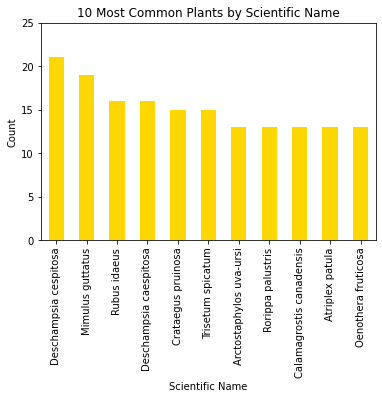

In [20]:
sci_name_data.plot.bar(x = "Family", y = "Count", 
                    color="gold")
# Add chart elements
plt.title("10 Most Common Plants by Scientific Name")
plt.xlim(-0.5, 10.5)
plt.ylim(0, 25)
plt.ylabel("Count")
plt.xlabel("Scientific Name")

In [21]:
# Get the percent each scientific name represents from total Plants
sci_name_percentage = sci_name_data/float(plant_count)*100

In [22]:
# Get the scientific name information into a new DataFrame.
sci_name_df = pd.DataFrame({"Count": sci_name_data,
                         "Percentage of Plants": sci_name_percentage})
# Format the columns.
sci_name_df["Percentage of Plants"] = sci_name_df["Percentage of Plants"].map("{:,.2f}%".format)

sci_name_df.head(10)

,Count,Percentage of Plants
Deschampsia cespitosa,21,0.13%
Mimulus guttatus,19,0.12%
Rubus idaeus,16,0.10%
Deschampsia caespitosa,16,0.10%
Crataegus pruinosa,15,0.09%
Trisetum spicatum,15,0.09%
Arctostaphylos uva-ursi,13,0.08%
Rorippa palustris,13,0.08%
Calamagrostis canadensis,13,0.08%
Atriplex patula,13,0.08%
